## Description about the DataSet

 - The DataSet contains Weight, Lenght, Height, and Width of 7 types of fish Species.
 - Our target is to predict the weight of the fist.
 - Independent Variables --> Species, Lenghts (1,2,3), Height, Width
 - Dependent Variable --> Weight

### Importing all required Libraries

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the DataSet and reading it with Pandas

In [272]:
df = pd.read_csv('Fish.csv')

### Getting shape of the DataSet

In [274]:
df.shape

(159, 7)

### Displaying head of the DataSet

In [277]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Getting basic information about the DataSet

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Getting statistical description about the DataSet

In [281]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Checking for missing values

In [282]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Getting number of unique values in each Feature


In [283]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

### Renaming Column names

In [206]:
df.rename({'Length1':'Vertical length'},axis='columns',inplace=True)
df.rename({'Length2':'Diagonal length'},axis='columns',inplace=True)
df.rename({'Length3':'Cross length'},axis='columns',inplace=True)

In [284]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

### Mapping values to each species of fish

In [286]:
df['Species'] = df['Species'].map({'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6})

### Getting which is the most recorded species

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

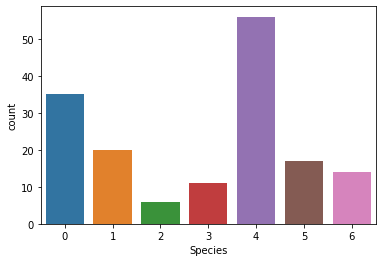

In [209]:
sns.countplot(df['Species'])

#### Observation for the CountPlot

 - We can observe that 'Perch' is the most recorded species.
 - The second most species recorded was 'Bream'.

### Plotting a correlation HeatMap between the Features

<AxesSubplot:>

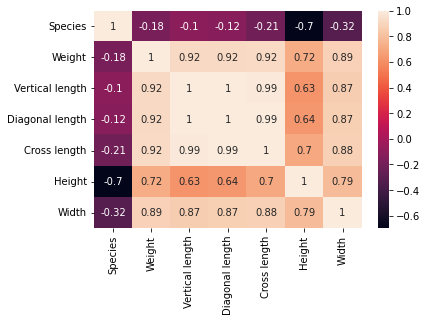

In [210]:
sns.heatmap(df.corr(), annot = True)

#### Observation from Heatmap
 - The most **positively** correlated Features are Lenght1 and Length3.
 - The most **positively** correlated Features are Lenght2 and Length3.
 - The most **negatively** corrleated Features are Species and Height.

### Plotting pairplot between all the variables

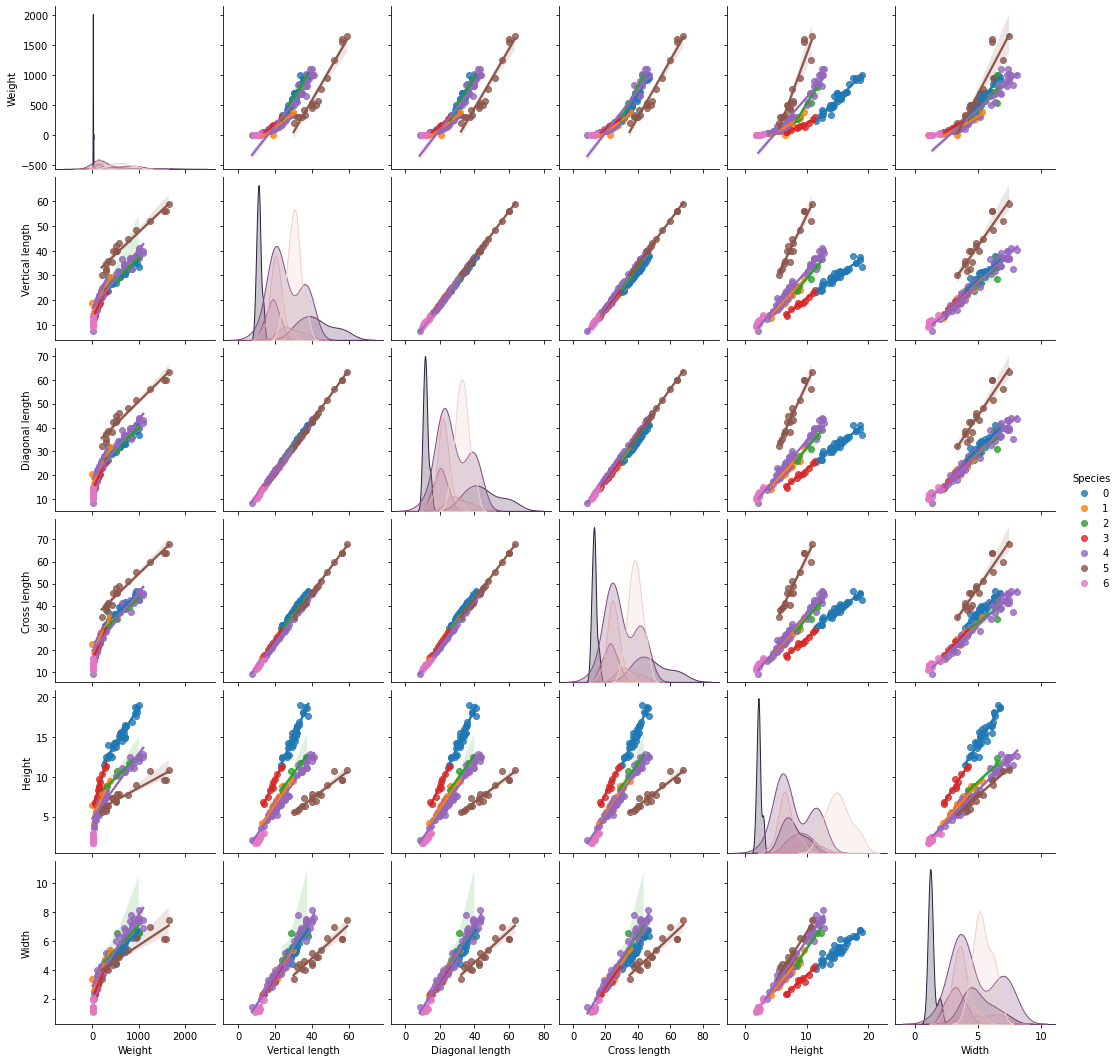

In [211]:
sns.pairplot(df, hue="Species", kind = 'reg')

### Selecting **Dependent** and **Independent** variables

In [212]:
X = df[['Species','Vertical length', 'Diagonal length', 'Cross length', 'Height', 'Width']]
y = df['Weight']

In [213]:
X.head()

,Species,Vertical length,Diagonal length,Cross length,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340


In [215]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

### Train Test split

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [217]:
X_train

,Species,Vertical length,Diagonal length,Cross length,Height,Width
57,2,25.6,28.0,30.8,8.7780,4.6816
15,0,29.4,32.0,37.2,15.4380,5.5800
156,6,12.1,13.0,13.8,2.2770,1.2558
33,0,37.4,41.0,45.9,18.6354,6.7473
126,4,40.2,43.5,46.0,12.6040,8.1420
...,...,...,...,...,...,...
88,4,20.0,22.0,23.5,6.1100,3.5250
124,4,39.8,43.0,45.2,11.9328,7.2772
54,1,29.5,31.7,35.0,9.4850,5.3550
133,5,36.0,38.5,41.0,6.3960,3.9770


In [219]:
X_test

,Species,Vertical length,Diagonal length,Cross length,Height,Width
34,0,38.0,41.0,46.5,17.6235,6.3705
122,4,37.1,40.0,42.5,11.1350,6.6300
21,0,31.4,34.0,39.2,15.9936,5.3704
142,5,56.0,60.0,64.0,9.6000,6.1440
130,5,32.7,35.0,38.8,5.9364,4.3844
114,4,34.5,37.0,39.4,10.8350,6.2646
2,0,23.9,26.5,31.1,12.3778,4.6961
128,5,30.0,32.3,34.8,5.5680,3.3756
46,1,21.0,22.5,25.0,6.5500,3.3250
39,1,18.6,20.0,22.2,6.2160,3.5742


In [220]:
y_train

57      306.0
15      600.0
156      12.2
33      975.0
126    1000.0
        ...  
88      130.0
124    1000.0
54      390.0
133     345.0
43      150.0
Name: Weight, Length: 111, dtype: float64

In [222]:
y_test

34      950.0
122     820.0
21      685.0
142    1600.0
130     300.0
114     700.0
2       340.0
128     200.0
46      140.0
39      120.0
107     300.0
134     456.0
151      10.0
23      680.0
121    1015.0
44      145.0
112     685.0
116     900.0
26      720.0
73       32.0
145       6.7
27      714.0
67      170.0
148       9.7
20      575.0
91      130.0
10      475.0
86      120.0
22      620.0
152       9.9
146       7.5
12      500.0
13      340.0
16      700.0
132     430.0
63       90.0
117     650.0
109     514.0
85      130.0
157      19.7
55      270.0
38       87.0
41      110.0
36       69.0
29     1000.0
69      200.0
103     260.0
56      270.0
Name: Weight, dtype: float64

### Standardizing the DataSet

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [225]:
X_train = scaler.fit_transform(X_train)

In [226]:
X_test = scaler.transform(X_test)

In [228]:
X_train

array([[-4.81347380e-01, -7.11252167e-02, -4.61999461e-02,
        -3.82008638e-02, -1.77481953e-02,  1.42462206e-01],
       [-1.50883890e+00,  3.05294061e-01,  3.24066770e-01,
         5.11149210e-01,  1.60573831e+00,  6.82032618e-01],
       [ 1.57363566e+00, -1.40840423e+00, -1.43470013e+00,
        -1.49741200e+00, -1.60247578e+00, -1.91504037e+00],
       [-1.50883890e+00,  1.09775570e+00,  1.15716688e+00,
         1.25792197e+00,  2.38515809e+00,  1.38310179e+00],
       [ 5.46144143e-01,  1.37511727e+00,  1.38858358e+00,
         1.26650556e+00,  9.14903359e-01,  2.22074521e+00],
       [-1.50883890e+00,  4.77440288e-02,  1.11163408e-01,
         2.96559337e-01,  1.15828007e+00,  2.90087326e-01],
       [-1.50883890e+00,  4.77440288e-02,  1.11163408e-01,
         2.79392148e-01,  1.29895786e+00,  5.00954614e-01],
       [ 5.46144143e-01, -1.10748298e-01, -1.10996622e-01,
        -2.18456357e-01, -1.28662063e-01,  4.16151250e-01],
       [ 5.46144143e-01,  8.20394124e-01,  7.869

In [230]:
X_test

array([[-1.5088389 ,  1.15719032,  1.15716688,  1.30942354,  2.13849052,
         1.15679933],
       [ 0.54614414,  1.06803839,  1.0646002 ,  0.96607974,  0.55681002,
         1.31265253],
       [-1.5088389 ,  0.50340947,  0.50920013,  0.68282111,  1.74117511,
         0.55614887],
       [ 1.0598899 ,  2.940229  ,  2.91593378,  2.81155264,  0.18262807,
         1.0207656 ],
       [ 1.0598899 ,  0.63218449,  0.60176681,  0.64848673, -0.71043577,
        -0.03603326],
       [ 0.54614414,  0.81048835,  0.78690017,  0.6999883 ,  0.48367999,
         1.0931968 ],
       [-1.5088389 , -0.23952331, -0.18504996, -0.01245008,  0.85976332,
         0.15117077],
       [ 1.0598899 ,  0.36472868,  0.35183677,  0.30514293, -0.80023944,
        -0.64190885],
       [-0.99509314, -0.52679066, -0.55531668, -0.53604937, -0.5608605 ,
        -0.67229873],
       [-0.99509314, -0.76452915, -0.78673338, -0.77639003, -0.64227859,
        -0.5226316 ],
       [ 0.54614414,  0.0576498 ,  0.01859673, -0.

### Model Training

In [231]:
from sklearn.linear_model import LinearRegression

In [233]:
regression = LinearRegression()

In [234]:
regression.fit(X_train, y_train)

LinearRegression()

In [235]:
## Print the coefficient and the intercept

print(regression.coef_)

[ 102.03206925  261.39768937 -588.54574891  509.58297186   98.04245452
  113.6467597 ]


In [237]:
print(regression.intercept_)

396.9225225225225


In [238]:
## On which parameter the model has been trained

regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [243]:
## Prediction with the test data

reg_pred = regression.predict(X_test)

In [288]:
reg_pred

array([ 8.72803085e+02,  8.01331095e+02,  6.56742676e+02,  1.12410528e+03,
        5.72859414e+02,  7.29741340e+02,  3.84401122e+02,  3.97419823e+02,
        7.99641801e+01,  4.05724496e+01,  3.89475944e+02,  6.74231661e+02,
       -8.96419529e+01,  7.13197421e+02,  8.80957268e+02,  8.08513538e+01,
        7.68549775e+02,  8.51129893e+02,  7.36951977e+02, -1.16697455e+02,
       -1.60549164e+02,  7.27394501e+02,  2.26191831e+02, -1.11338529e+02,
        6.60189645e+02,  1.84354589e+02,  5.51745115e+02,  1.68070685e+02,
        6.36544718e+02, -9.76892354e+01, -1.32321883e+02,  4.89093552e+02,
        5.63357139e+02,  6.13077873e+02,  6.01742991e+02,  7.30903962e+01,
        7.49402414e+02,  5.82712652e+02,  1.72645434e+02, -1.55701120e+01,
        2.77584487e+02, -4.89100395e-01,  3.59639909e+01, -7.21418863e+01,
        8.51352634e+02,  3.11561403e+02,  3.33028952e+02,  2.83980725e+02])

### Plot a scatter plot for the prediction


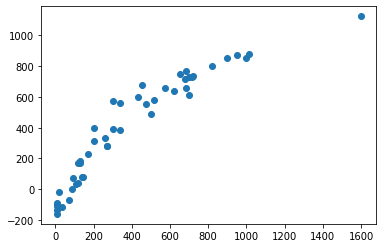

In [248]:
plt.scatter(y_test, reg_pred)

In [289]:
## residuals

residuals = y_test - reg_pred
residuals

34      77.196915
122     18.668905
21      28.257324
142    475.894725
130   -272.859414
114    -29.741340
2      -44.401122
128   -197.419823
46      60.035820
39      79.427550
107    -89.475944
134   -218.231661
151     99.641953
23     -33.197421
121    134.042732
44      64.148646
112    -83.549775
116     48.870107
26     -16.951977
73     148.697455
145    167.249164
27     -13.394501
67     -56.191831
148    121.038529
20     -85.189645
91     -54.354589
10     -76.745115
86     -48.070685
22     -16.544718
152    107.589235
146    139.821883
12      10.906448
13    -223.357139
16      86.922127
132   -171.742991
63      16.909604
117    -99.402414
109    -68.712652
85     -42.645434
157     35.270112
55      -7.584487
38      87.489100
41      74.036009
36     141.141886
29     148.647366
69    -111.561403
103    -73.028952
56     -13.980725
Name: Weight, dtype: float64

### plotting the residuals


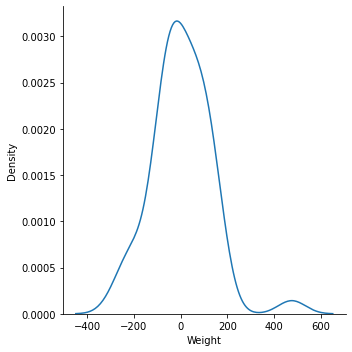

In [291]:
sns.displot(residuals, kind ='kde')

### scatter plot with respect to predictions and residuals

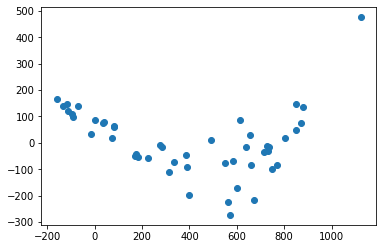

In [255]:
plt.scatter(reg_pred, residuals)

In [259]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))

print(np.sqrt(mean_squared_error(y_test, reg_pred)))

94.17165317842283
15713.638775325448
125.35405368525362


## R square and adjusted R square

In [265]:
## R square 

from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.8696165243006551


In [292]:
## Adjusted R square

1 - (1-score) * (len(y_test)-1)/ (len(y_test) - X_test.shape[1] - 1)

0.8505360156617265

#### Observation 
 - From the Predicted scores we can observe that the difference bettween them are little.
 - Which shows that the model is in a Generalized form.